# **Twitter Sentiment Analysis**


Importanat Dependencies

In [81]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv('twitter_training.csv')

In [3]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df.drop(columns=['2401'], inplace=True)

In [5]:
df.columns

Index(['Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [7]:
df.rename(columns = {'Borderlands':'Game_Name','Positive':'Sentiment','im getting on borderlands and i will murder you all ,':'tweet'}, inplace = True)

In [8]:
df.head()

,Game_Name,Sentiment,tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


Handling Missing Values

In [10]:
df.isna().sum()

,0
Game_Name,0
Sentiment,0
tweet,686


In [11]:
df.shape

(74681, 3)

In [14]:
df = df.dropna()

In [15]:
df.isna().sum()

,0
Game_Name,0
Sentiment,0
tweet,0


Creating a new Data set

In [16]:
df.Sentiment.value_counts()

,count
Sentiment,
Negative,22358
Positive,20654
Neutral,18108
Irrelevant,12875


In [20]:
df_positive = df[df.Sentiment == 'Positive'].iloc[:2000]
df_negative = df[df.Sentiment == 'Negative'].iloc[:2000]
df_neutral = df[df.Sentiment == 'Neutral'].iloc[:2000]
df_irrelevant = df[df.Sentiment == 'Irrelevant'].iloc[:2000]

In [21]:
df2 = pd.concat([df_positive,df_negative,df_neutral,df_irrelevant], axis = 0)

In [22]:
df2.shape

(8000, 3)

In [23]:
df2.Sentiment.value_counts()

,count
Sentiment,
Positive,2000
Negative,2000
Neutral,2000
Irrelevant,2000


Categorical to numeric data conversion

In [25]:
df2.Game_Name.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)'], dtype=object)

In [28]:
game_df = ( pd.get_dummies(df2.Game_Name)).astype(int)

In [29]:
game_df

,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries)
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
10628,0,0,0,0,1
10629,0,0,0,0,1
10630,0,0,0,0,1
10631,0,0,0,0,1


In [30]:
df2.head()

,Game_Name,Sentiment,tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [31]:
df2.drop(columns=['Game_Name'], inplace=True)

In [32]:
df2.shape, game_df.shape

((8000, 2), (8000, 5))

Tect preprocessing

In [33]:
nlp = spacy.load('en_core_web_sm')

In [34]:
def lemmatization(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

In [35]:
df2['lemma'] = df2['tweet'].apply(lemmatization)

In [36]:
df2.head()

,Sentiment,tweet,lemma
0,Positive,I am coming to the borders and I will kill you...,"I be come to the border and I will kill you all ,"
1,Positive,im getting on borderlands and i will kill you ...,"I m get on borderland and I will kill you all ,"
2,Positive,im coming on borderlands and i will murder you...,I m come on borderland and I will murder you a...
3,Positive,im getting on borderlands 2 and i will murder ...,I m get on borderland 2 and I will murder you ...
4,Positive,im getting into borderlands and i can murder y...,I m get into borderland and I can murder you a...


In [40]:
def remove_stopwords(text):
    doc = nlp(text)
    no_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(no_stop_words)

In [42]:
df2['final'] = df2['lemma'].apply(remove_stopwords)

In [43]:
df2.head()

,Sentiment,tweet,lemma,final
0,Positive,I am coming to the borders and I will kill you...,"I be come to the border and I will kill you all ,",come border kill
1,Positive,im getting on borderlands and i will kill you ...,"I m get on borderland and I will kill you all ,",m borderland kill
2,Positive,im coming on borderlands and i will murder you...,I m come on borderland and I will murder you a...,m come borderland murder
3,Positive,im getting on borderlands 2 and i will murder ...,I m get on borderland 2 and I will murder you ...,m borderland 2 murder
4,Positive,im getting into borderlands and i can murder y...,I m get into borderland and I can murder you a...,m borderland murder


In [44]:
df2.drop(columns=['tweet','lemma'], inplace=True)

In [45]:
df2.head()

,Sentiment,final
0,Positive,come border kill
1,Positive,m borderland kill
2,Positive,m come borderland murder
3,Positive,m borderland 2 murder
4,Positive,m borderland murder


In [46]:
sentiment_df = ( pd.concat([df2,game_df], axis = 1))

In [47]:
sentiment_df.head()

,Sentiment,final,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries)
0,Positive,come border kill,0,1,0,0,0
1,Positive,m borderland kill,0,1,0,0,0
2,Positive,m come borderland murder,0,1,0,0,0
3,Positive,m borderland 2 murder,0,1,0,0,0
4,Positive,m borderland murder,0,1,0,0,0


In [48]:
df2.isna().sum()

,0
Sentiment,0
final,0


Dividing the dataset

In [49]:
X = sentiment_df.drop(columns=['Sentiment'])
y = sentiment_df['Sentiment']

TfidfVectorizer

In [52]:
tfidf = TfidfVectorizer()

In [53]:
tfidf.fit(X['final'])

TfidfVectorizer()

In [57]:
tfidf_matrix = tfidf.transform(X['final']).toarray()

In [58]:
print(tfidf_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [59]:
vectorizer_df = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())

In [60]:
vectorizer_df.head()

,00,000,01,02,03,03573057,0359873057,04,05,06,...,zxxxvids,zyfapoihpy,ееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееее,есть,июля,сетью,третьарце,اللعبه,حبيت,خلاص
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
X.drop(columns=['final'], inplace=True)

In [63]:
X.shape, vectorizer_df.shape

((8000, 5), (8000, 6720))

In [64]:
X = pd.concat([X,vectorizer_df], axis = 1)

In [65]:
X.head()

,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries),00,000,01,02,03,...,zxxxvids,zyfapoihpy,ееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееее,есть,июля,сетью,третьарце,اللعبه,حبيت,خلاص
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
X.isna().sum()

,0
Amazon,952
Borderlands,952
CallOfDutyBlackopsColdWar,952
Overwatch,952
Xbox(Xseries),952
...,...
сетью,952
третьарце,952
اللعبه,952
حبيت,952


In [67]:
X = X.fillna(0)

In [68]:
X.isna().sum()

,0
Amazon,0
Borderlands,0
CallOfDutyBlackopsColdWar,0
Overwatch,0
Xbox(Xseries),0
...,...
сетью,0
третьарце,0
اللعبه,0
حبيت,0


In [71]:
X = X.iloc[:8000]

In [72]:
X_trin, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Train test split

In [73]:
X_trin.shape, X_test.shape, y_train.shape, y_test.shape

((6400, 6725), (1600, 6725), (6400,), (1600,))

Building Model

In [75]:
model = RandomForestClassifier(n_jobs=1, random_state=42, n_estimators=200)
model.fit(X_trin, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=1, random_state=42)

In [76]:
pred = model.predict(X_test)

In [77]:
y_test[:5]

,Sentiment
1246,Negative
2892,Negative
4073,Positive
4786,Negative
1263,Neutral


In [78]:
pred[:5]

array(['Irrelevant', 'Irrelevant', 'Irrelevant', 'Neutral', 'Positive'],
      dtype=object)

In [79]:
accuracy_score(y_test, pred)

0.71

In [80]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

  Irrelevant       0.73      0.73      0.73       399
    Negative       0.73      0.59      0.65       379
     Neutral       0.70      0.74      0.72       397
    Positive       0.69      0.78      0.73       425

    accuracy                           0.71      1600
   macro avg       0.71      0.71      0.71      1600
weighted avg       0.71      0.71      0.71      1600



<Axes: >

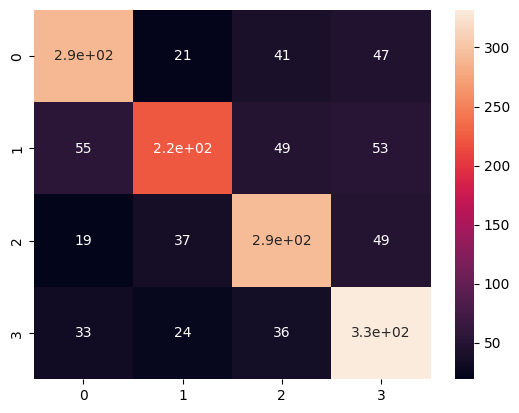

In [84]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter
logreg_model.fit(X_trin, y_train)
logreg_pred = logreg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

# Support Vector Machine (SVM) Model
svm_model = SVC()
svm_model.fit(X_trin, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

Logistic Regression Accuracy: 0.656875
              precision    recall  f1-score   support

  Irrelevant       0.76      0.64      0.70       399
    Negative       0.64      0.51      0.57       379
     Neutral       0.66      0.66      0.66       397
    Positive       0.60      0.80      0.69       425

    accuracy                           0.66      1600
   macro avg       0.67      0.65      0.65      1600
weighted avg       0.67      0.66      0.65      1600

SVM Accuracy: 0.685
              precision    recall  f1-score   support

  Irrelevant       0.77      0.68      0.72       399
    Negative       0.72      0.53      0.61       379
     Neutral       0.69      0.69      0.69       397
    Positive       0.61      0.83      0.71       425

    accuracy                           0.69      1600
   macro avg       0.70      0.68      0.68      1600
weighted avg       0.70      0.69      0.68      1600



In [86]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_model.fit(X_trin, y_train)
gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.62125
              precision    recall  f1-score   support

  Irrelevant       0.81      0.60      0.69       399
    Negative       0.71      0.31      0.43       379
     Neutral       0.62      0.65      0.63       397
    Positive       0.52      0.89      0.66       425

    accuracy                           0.62      1600
   macro avg       0.67      0.61      0.60      1600
weighted avg       0.66      0.62      0.61      1600



In [87]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_trin, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.63125
              precision    recall  f1-score   support

  Irrelevant       0.79      0.60      0.68       399
    Negative       0.71      0.42      0.52       379
     Neutral       0.67      0.62      0.64       397
    Positive       0.52      0.87      0.65       425

    accuracy                           0.63      1600
   macro avg       0.67      0.62      0.62      1600
weighted avg       0.67      0.63      0.63      1600

